# Final Project - DATA620 Web Analytics
Daniel Dittenhafer & Justin Hink

In [1]:
import csv

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt

import networkx as nx
import networkx_helpers as nxh
nx.__version__

'1.11'

In [21]:
imageDest = "../images/"
graphmlDest = "../data/"
dataFile = "../data/TrumpCabinet.csv"
dataset = []
with open( dataFile, "rb" ) as theFile:
    reader = csv.DictReader( theFile )
    for line in reader:
        dataset.append(line)
        # line is { 'workers': 'w0', 'constant': 7.334, 'age': -1.406, ... }
        # e.g. print( line[ 'workers' ] ) yields 'w0'

In [3]:
dataset[0]

{'Cabinet Seat': 'Attorney General',
 'CampaignPosition': '',
 'OrgType': 'Government',
 'Organization': 'Congress',
 'PastTrump': '',
 'Person': 'Jeff Sessions',
 'Prior Position': 'Senator',
 'Wikipedia': 'https://en.wikipedia.org/wiki/Jeff_Sessions'}

In [12]:
people = []
for i in dataset:
    people.append(i["Person"])

gxOrgType = nx.Graph()
for i in dataset:
    gxOrgType.add_edge(i["Person"],i["OrgType"])
    
gxPriorPosition = nx.Graph()
for i in dataset:
    gxPriorPosition.add_edge(i["Person"],i["Prior Position"])   
    
gxOrganization = nx.Graph()
for i in dataset:
    gxOrganization.add_edge(i["Person"],i["Organization"])     
    
gxCombined = nx.Graph()
for i in dataset:
    gxCombined.add_edge(i["Person"],i["Prior Position"]) 
    gxCombined.add_edge(i["Person"],i["OrgType"])

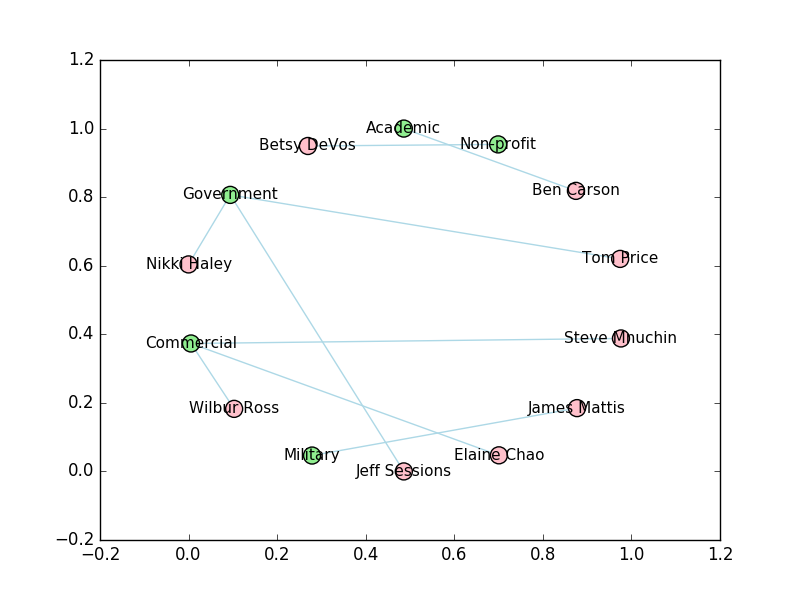

In [28]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgTypeGraph.png"
nx.write_graphml(gxPriorPosition, "../data/OrgTypeGraph.graphml")
nxh.renderGraph(gxOrgType, graphFile, False, top=people)

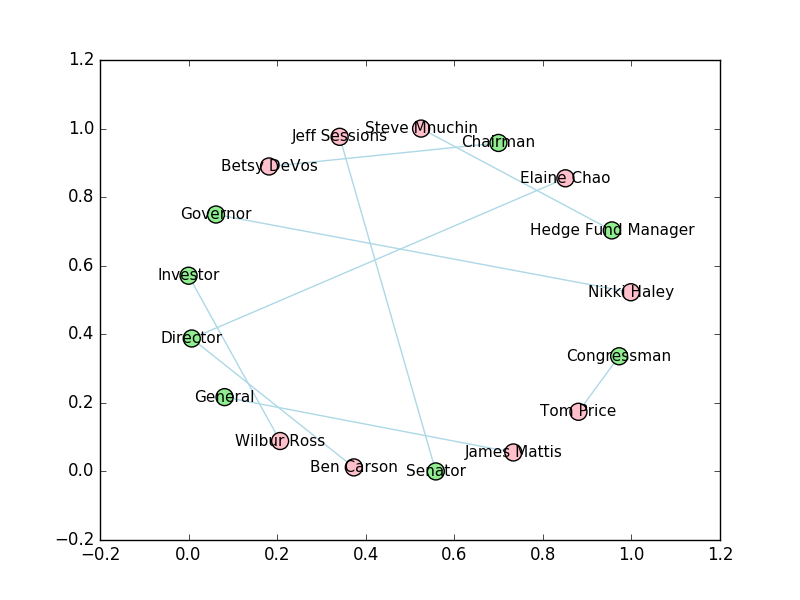

In [25]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-PriorPositionGraph.png"
nx.write_graphml(gxPriorPosition, "../data/PriorPositionGraph.graphml")
nxh.renderGraph(gxPriorPosition, graphFile, False, top=people)

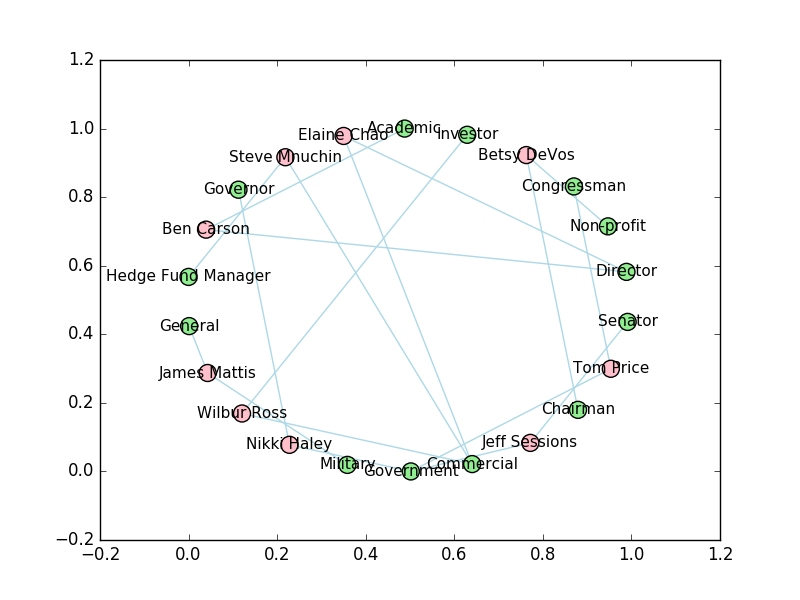

In [26]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-CombinedGraph.png"
nx.write_graphml(gxCombined, "../data/CombinedGraph.graphml")
nxh.renderGraph(gxCombined, graphFile, False, top=people)

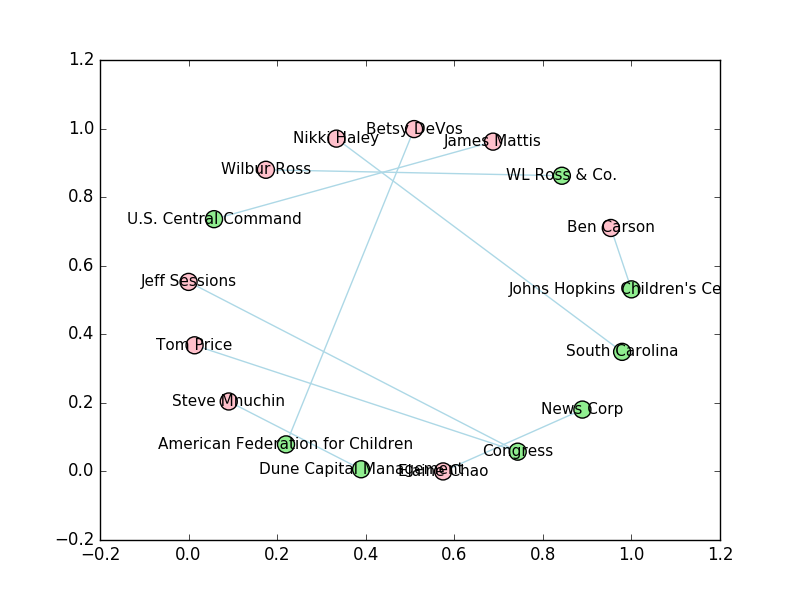

In [27]:
graphFile = imageDest + "DittenhaferHink-DATA620-FinalProj-OrgGraph.png"
nx.write_graphml(gxOrganization, "../data/OrgGraph.graphml")
nxh.renderGraph(gxOrganization, graphFile, False, top=people)